In [168]:
import pandas as pd

# Load the data from the CSV file
file_path = r'C:\Users\clint\Desktop\Research-Proposal-Trucks\result_df.csv'
result_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
result_df

,CRASH_ID,REPORT_STATE,REPORT_DATE,REPORT_SEQ_NO,LOCATION,CITY_CODE,CITY,STATE,COUNTY_CODE,VEHICLES_IN_ACCIDENT,FATALITIES,INJURIES,CRASH_EVENT_SEQ_ID_DESC
0,4860792,CA,20241017,1,34.441682 / -118.568696,NaN,SANTA CLARITA,CA,37.0,2.0,0,0,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
1,4860781,CA,20241117,1,ANNADALE AV / 26 FT W J ST,NaN,SANGER,CA,19.0,2.0,0,1,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
2,4860550,ID,20241206,2,DIVIDE CREEK,NaN,MERIDIAN,ID,1.0,2.0,0,1,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
3,4860541,ID,20241122,1,BEST BUSINESS AVE,NaN,KUNA,ID,1.0,2.0,0,0,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
4,4860302,IL,20241205,2,S WEST ST,NaN,Olney Twp,IL,159.0,4.0,0,0,2:14:COLLISION INVOLVING PARKED MOTOR VEHICLE;...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46313,16220,SD,19970923,1,6TH ST,NaN,SIOUX FALLS,SD,99.0,2.0,0,0,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
46314,16111,SD,20000716,1,I-90,NaN,RURAL,SD,93.0,2.0,0,0,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
46315,16017,SD,20010203,1,I-29,NaN,RURAL,SD,99.0,7.0,0,1,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
46316,15968,SD,19990120,1,I-90,NaN,RURAL,SD,99.0,2.0,0,0,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE


In [169]:
selected_columns = result_df[['REPORT_DATE', 'FATALITIES', 'INJURIES', 'VEHICLES_IN_ACCIDENT']]
selected_columns

,REPORT_DATE,FATALITIES,INJURIES,VEHICLES_IN_ACCIDENT
0,20241017,0,0,2.0
1,20241117,0,1,2.0
2,20241206,0,1,2.0
3,20241122,0,0,2.0
4,20241205,0,0,4.0
...,...,...,...,...
46313,19970923,0,0,2.0
46314,20000716,0,0,2.0
46315,20010203,0,1,7.0
46316,19990120,0,0,2.0


In [170]:
selected_columns['REPORT_DATE'] = pd.to_datetime(selected_columns['REPORT_DATE'], format='%Y%m%d')
selected_columns

C:\Users\clint\AppData\Local\Temp\ipykernel_15720\916107447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['REPORT_DATE'] = pd.to_datetime(selected_columns['REPORT_DATE'], format='%Y%m%d')


,REPORT_DATE,FATALITIES,INJURIES,VEHICLES_IN_ACCIDENT
0,2024-10-17,0,0,2.0
1,2024-11-17,0,1,2.0
2,2024-12-06,0,1,2.0
3,2024-11-22,0,0,2.0
4,2024-12-05,0,0,4.0
...,...,...,...,...
46313,1997-09-23,0,0,2.0
46314,2000-07-16,0,0,2.0
46315,2001-02-03,0,1,7.0
46316,1999-01-20,0,0,2.0


In [171]:
import pandas as pd

# Assuming selected_columns is your DataFrame
grouped_data = selected_columns.groupby('REPORT_DATE').sum().reset_index()


In [172]:
grouped_data = grouped_data[grouped_data['REPORT_DATE'] >= '2000-01-01']
grouped_data

,REPORT_DATE,FATALITIES,INJURIES,VEHICLES_IN_ACCIDENT
1636,2000-01-02,0,0,2.0
1637,2000-01-03,0,2,8.0
1638,2000-01-04,0,5,11.0
1639,2000-01-05,0,5,9.0
1640,2000-01-06,0,3,4.0
...,...,...,...,...
10179,2024-12-10,0,0,2.0
10180,2024-12-11,0,0,5.0
10181,2024-12-12,0,0,4.0
10182,2024-12-13,0,1,2.0


<Axes: xlabel='REPORT_DATE'>

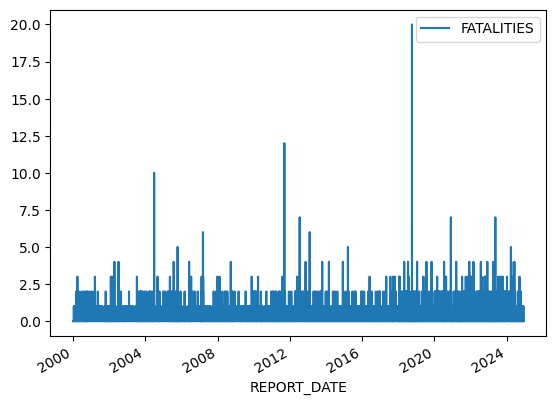

In [173]:
grouped_data.plot(x='REPORT_DATE', y='FATALITIES', kind='line')

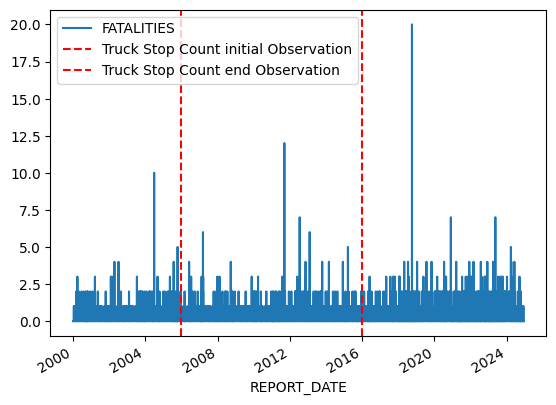

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'grouped_data' is defined and has the correct columns
if 'grouped_data' in locals() and 'REPORT_DATE' in grouped_data.columns and 'FATALITIES' in grouped_data.columns:
    # Convert 'REPORT_DATE' to datetime if it's not already
    grouped_data['REPORT_DATE'] = pd.to_datetime(grouped_data['REPORT_DATE'])
    
    ax = grouped_data.plot(x='REPORT_DATE', y='FATALITIES', kind='line')
    
    # Add vertical line
    plt.axvline(pd.to_datetime('2006-01-01'), color='r', linestyle='--', label='Truck Stop Count initial Observation')
    plt.axvline(pd.to_datetime('2016-01-01'), color='r', linestyle='--', label='Truck Stop Count end Observation')
    
    plt.legend()
    plt.show()
else:
    print("Ensure 'grouped_data' is defined and has 'REPORT_DATE' and 'FATALITIES' columns.")

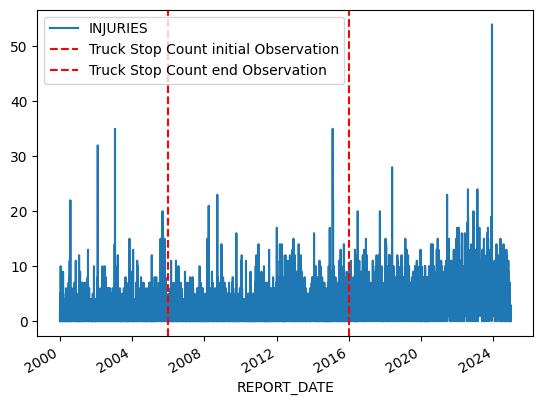

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'grouped_data' is defined and has the correct columns
if 'grouped_data' in locals() and 'REPORT_DATE' in grouped_data.columns and 'INJURIES' in grouped_data.columns:
    # Convert 'REPORT_DATE' to datetime if it's not already
    grouped_data['REPORT_DATE'] = pd.to_datetime(grouped_data['REPORT_DATE'])
    
    ax = grouped_data.plot(x='REPORT_DATE', y='INJURIES', kind='line')
    
    # Add vertical line
    plt.axvline(pd.to_datetime('2006-01-01'), color='r', linestyle='--', label='Truck Stop Count initial Observation')
    plt.axvline(pd.to_datetime('2016-01-01'), color='r', linestyle='--', label='Truck Stop Count end Observation')
    
    plt.legend()
    plt.show()
else:
    print("Ensure 'grouped_data' is defined and has 'REPORT_DATE' and 'FATALITIES' columns.")

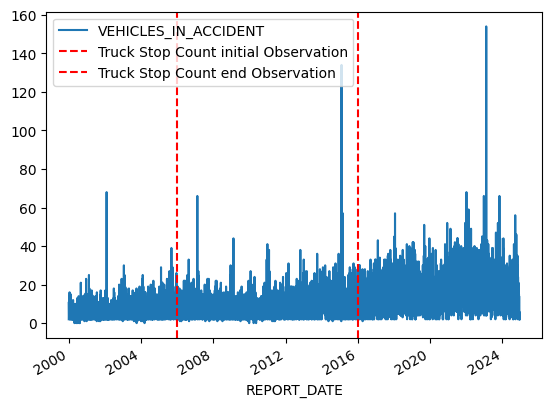

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'grouped_data' is defined and has the correct columns
if 'grouped_data' in locals() and 'REPORT_DATE' in grouped_data.columns and 'VEHICLES_IN_ACCIDENT' in grouped_data.columns:
    # Convert 'REPORT_DATE' to datetime if it's not already
    grouped_data['REPORT_DATE'] = pd.to_datetime(grouped_data['REPORT_DATE'])
    
    ax = grouped_data.plot(x='REPORT_DATE', y='VEHICLES_IN_ACCIDENT', kind='line')
    
    # Add vertical line
    plt.axvline(pd.to_datetime('2006-01-01'), color='r', linestyle='--', label='Truck Stop Count initial Observation')
    plt.axvline(pd.to_datetime('2016-01-01'), color='r', linestyle='--', label='Truck Stop Count end Observation')
    
    plt.legend()
    plt.show()
else:
    print("Ensure 'grouped_data' is defined and has 'REPORT_DATE' and 'FATALITIES' columns.")

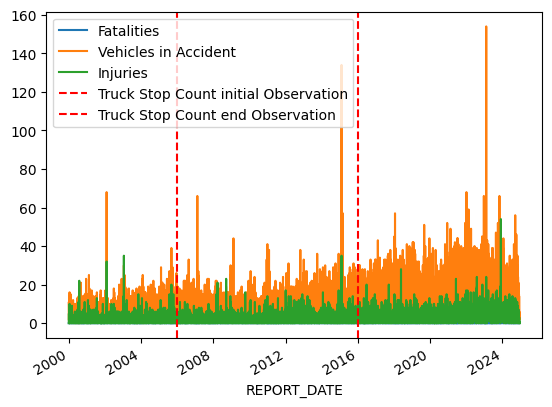

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'grouped_data' is defined and has the correct columns
if 'grouped_data' in locals() and 'REPORT_DATE' in grouped_data.columns and 'FATALITIES' in grouped_data.columns and 'VEHICLES_IN_ACCIDENT' in grouped_data.columns and 'INJURIES' in grouped_data.columns:
    # Convert 'REPORT_DATE' to datetime if it's not already
    grouped_data['REPORT_DATE'] = pd.to_datetime(grouped_data['REPORT_DATE'])
    
    ax = grouped_data.plot(x='REPORT_DATE', y='FATALITIES', kind='line', label='Fatalities')
    
    # Plot additional columns
    grouped_data.plot(x='REPORT_DATE', y='VEHICLES_IN_ACCIDENT', kind='line', ax=ax, label='Vehicles in Accident')
    grouped_data.plot(x='REPORT_DATE', y='INJURIES', kind='line', ax=ax, label='Injuries')
    
    # Add vertical lines
    plt.axvline(pd.to_datetime('2006-01-01'), color='r', linestyle='--', label='Truck Stop Count initial Observation')
    plt.axvline(pd.to_datetime('2016-01-01'), color='r', linestyle='--', label='Truck Stop Count end Observation')
    
    plt.legend()
    plt.show()
else:
    print("Ensure 'grouped_data' is defined and has 'REPORT_DATE', 'FATALITIES', 'VEHICLES_IN_ACCIDENT', and 'INJURIES' columns.")

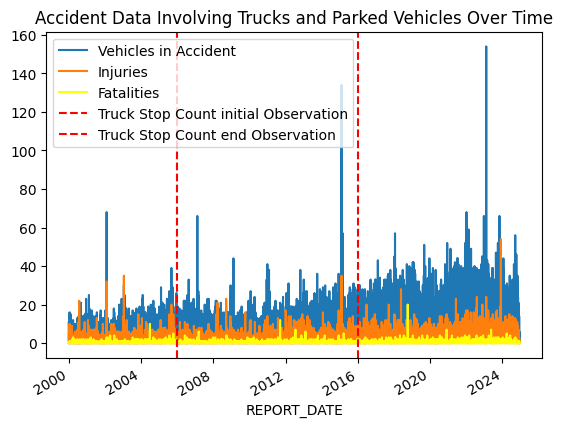

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'grouped_data' is defined and has the correct columns
if 'grouped_data' in locals() and 'REPORT_DATE' in grouped_data.columns and 'FATALITIES' in grouped_data.columns and 'VEHICLES_IN_ACCIDENT' in grouped_data.columns and 'INJURIES' in grouped_data.columns:
    # Convert 'REPORT_DATE' to datetime if it's not already
    grouped_data['REPORT_DATE'] = pd.to_datetime(grouped_data['REPORT_DATE'])
    
    ax = grouped_data.plot(x='REPORT_DATE', y='VEHICLES_IN_ACCIDENT', kind='line', label='Vehicles in Accident')
    grouped_data.plot(x='REPORT_DATE', y='INJURIES', kind='line', ax=ax, label='Injuries')
    grouped_data.plot(x='REPORT_DATE', y='FATALITIES', kind='line', ax=ax, label='Fatalities',color='yellow')
    
    # Add vertical lines
    plt.axvline(pd.to_datetime('2006-01-01'), color='r', linestyle='--', label='Truck Stop Count initial Observation')
    plt.axvline(pd.to_datetime('2016-01-01'), color='r', linestyle='--', label='Truck Stop Count end Observation')
    plt.title('Accident Data Involving Trucks and Parked Vehicles Over Time')
    plt.legend()
    plt.show()
else:
    print("Ensure 'grouped_data' is defined and has 'REPORT_DATE', 'FATALITIES', 'VEHICLES_IN_ACCIDENT', and 'INJURIES' columns.")